TP_3 Les Réseaux de Neurones Convolutifs

Objectif:
Dans ce TP, on va essayer de résoudre un probléme de reconnaissance d'images en utilisant les CNNS. On va utiliser 3 architectures differentes, les évaluer, et deduire la meilleure architecture.

In [47]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential


Load dataset
On va charger les données, 60 000 images d'apprentissages  et 10 000 images de test en niveaux de gris.
Les images sont des matrices carrées de taille 28x28 et sont que des chiffres uniques entre  et 9.

Reshape data
Les images MNIST sont fournies en format (60000, 28, 28) pour les données d'entraînement, et (10000, 28, 28) pour celles de test.
Il manque une dimension pour les "canaux" (channels), qui est indispensable pour les CNNs.
Un CNN attend des entrées en format 4D :
[nombre d'images, largeur, hauteur, nombre de canaux]

One Hot encoding
Un CNN ne peut pas prédire directement des entiers. Il prévoit un vecteur de probabilités pour chaque classe.
On va utilisé le One-Hot Encoding pour convertir chaque chiffre (0 à 9) en un vecteur de taille 10 où un seul élément est 1, et le reste sont des 0.


In [48]:
def get_data_mnist():
    # Load dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    # Reshape to be [samples][width][height][pixels] = (batch, 28, 28, 1)
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

    # One hot encode outputs
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    num_classes = y_test.shape[1]

    return (X_train, y_train), (X_test, y_test), num_classes


Small CNN 
Ce modèle CNN simple est composé de deux couches de convolution (3x3), suivies d’un flatten et d’une sortie softmax.
Il sert de base pour observer le comportement d’un réseau de neurones convolutifs minimaliste sur MNIST.
Il permet déjà d’obtenir de bons résultats pour des tâches simples de classification.

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
def small_model(num_classes):
    # create model
    model = Sequential()  #Pour déclarer un nouveau modèle de deep learning
    model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))  #convolution de 64 filtres en 3×3 suivie d’une couche d’activation ReLU
    model.add(Conv2D(32, (3, 3), activation='relu'))  #convolution de 32 filtres en 3×3 suivie d’une couche d’activation ReLU
    model.add(Flatten()) #création du vecteur final à envoyer au réseau de neurones artificiels
    model.add(Dense(num_classes, activation='softmax'))

    # Compiler le modèle
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


Entraînement du modèle

In [50]:
num_classes=10
(X_train, y_train), (X_test, y_test), num_classes = get_data_mnist()
model = small_model(num_classes)

# Entraînement du modèle
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)


Epoch 1/10
300/300 - 26s - 86ms/step - accuracy: 0.9246 - loss: 0.8608 - val_accuracy: 0.9731 - val_loss: 0.0874
Epoch 2/10
300/300 - 21s - 71ms/step - accuracy: 0.9808 - loss: 0.0642 - val_accuracy: 0.9764 - val_loss: 0.0793
Epoch 3/10
300/300 - 21s - 70ms/step - accuracy: 0.9860 - loss: 0.0436 - val_accuracy: 0.9788 - val_loss: 0.0782
Epoch 4/10
300/300 - 21s - 70ms/step - accuracy: 0.9905 - loss: 0.0290 - val_accuracy: 0.9795 - val_loss: 0.0814
Epoch 5/10
300/300 - 21s - 69ms/step - accuracy: 0.9925 - loss: 0.0229 - val_accuracy: 0.9769 - val_loss: 0.0954
Epoch 6/10
300/300 - 21s - 71ms/step - accuracy: 0.9929 - loss: 0.0224 - val_accuracy: 0.9756 - val_loss: 0.0989
Epoch 7/10
300/300 - 21s - 70ms/step - accuracy: 0.9944 - loss: 0.0167 - val_accuracy: 0.9779 - val_loss: 0.0974
Epoch 8/10
300/300 - 21s - 69ms/step - accuracy: 0.9955 - loss: 0.0132 - val_accuracy: 0.9775 - val_loss: 0.1215
Epoch 9/10
300/300 - 21s - 70ms/step - accuracy: 0.9952 - loss: 0.0145 - val_accuracy: 0.9772 - 

Le modèle atteint rapidement une bonne précision, avec 99,5 % sur les données d'entraînement à la 10ᵉ époque.

Cependant, la perte de validation augmente après quelques époques, ce qui indique un début d'overfitting (le modèle mémorise au lieu de généraliser).

Le val_loss monte jusqu’à 0.142, ce qui est relativement élevé comparé au début de l'entraînement.

In [51]:
def print_model_error_rate(model, X_test, y_test):
    # Évaluation finale du modèle
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Model score : %.2f%%" % (scores[1] * 100))
    print("Model error rate : %.2f%%" % (100 - scores[1] * 100))
print_model_error_rate(model, X_test, y_test)    


Model score : 97.69%
Model error rate : 2.31%


Le score final sur les données de test est 97,69 %, ce qui reste très bon.

Le taux d’erreur est de 2,31 %, mais il aurait pu être meilleur.

Données Normalisées

In [52]:
def get_data_mnist_normalized():
    # Load dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    # Reshape to be [samples][width][height][pixels] = (batch, 28, 28, 1)
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

    # Normalize pixel values to [0,1]
    X_train /= 255.0
    X_test /= 255.0

    # One hot encode outputs
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    num_classes = y_test.shape[1]

    return (X_train, y_train), (X_test, y_test), num_classes


Entraînement du small CNN aprés normalisation des données

In [53]:
(X_train_normalized, y_train_normalized), (X_test_normalized, y_test_normalized), num_classes = get_data_mnist_normalized()
model_normalized = small_model(num_classes)

# Entraînement du modèle
model_normalized.fit(X_train_normalized, y_train_normalized, validation_data=(X_test_normalized, y_test_normalized), epochs=10, batch_size=200, verbose=2)


Epoch 1/10
300/300 - 22s - 73ms/step - accuracy: 0.9391 - loss: 0.2255 - val_accuracy: 0.9771 - val_loss: 0.0715
Epoch 2/10
300/300 - 21s - 69ms/step - accuracy: 0.9819 - loss: 0.0625 - val_accuracy: 0.9835 - val_loss: 0.0530
Epoch 3/10
300/300 - 23s - 76ms/step - accuracy: 0.9866 - loss: 0.0438 - val_accuracy: 0.9840 - val_loss: 0.0478
Epoch 4/10
300/300 - 22s - 74ms/step - accuracy: 0.9893 - loss: 0.0346 - val_accuracy: 0.9856 - val_loss: 0.0488
Epoch 5/10
300/300 - 21s - 70ms/step - accuracy: 0.9918 - loss: 0.0261 - val_accuracy: 0.9853 - val_loss: 0.0476
Epoch 6/10
300/300 - 21s - 71ms/step - accuracy: 0.9937 - loss: 0.0196 - val_accuracy: 0.9867 - val_loss: 0.0468
Epoch 7/10
300/300 - 21s - 71ms/step - accuracy: 0.9953 - loss: 0.0160 - val_accuracy: 0.9863 - val_loss: 0.0489
Epoch 8/10
300/300 - 21s - 70ms/step - accuracy: 0.9962 - loss: 0.0124 - val_accuracy: 0.9856 - val_loss: 0.0509
Epoch 9/10
300/300 - 21s - 70ms/step - accuracy: 0.9973 - loss: 0.0098 - val_accuracy: 0.9854 - 

Le modèle démarre avec une perte plus faible 0.2255 contre 0.8608 dès la première époque.

La val_loss reste stable et basse tout au long de l'entraînement, preuve que le modèle généralise mieux.

Pas de signe d’overfitting apparent après 10 époques.

Le modèle apprend plus efficacement et converge plus vite.

In [54]:
print_model_error_rate(model_normalized, X_test_normalized, y_test_normalized)    

Model score : 98.69%
Model error rate : 1.31%


Le score final atteint 98,69 %, soit 1,31 % de taux d’erreur, ce qui est nettement meilleur que sans normalisation.

Cela confirme que la normalisation améliore la précision, la stabilité et la capacité du modèle à bien se comporter sur de nouvelles données.

Meduim CNN

Ce modèle CNN de complexité moyenne comprend une couche de convolution 5x5 suivie d'un max-pooling, puis un dropout pour éviter l’overfitting. Il se termine par un dense à 128 neurones puis un softmax pour la classification.
Il est plus puissant que le modèle Small CNN et constitue une bonne base pour des performances solides.

In [55]:
from keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

def medium_model(input_shape=(28, 28, 1), num_classes=10):
    model = Sequential()
    model.add(Conv2D(32, (5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [56]:
# Chargement des données normalisées
(X_train, y_train), (X_test, y_test), num_classes = get_data_mnist_normalized()

# Création du modèle Medium
model_medium = medium_model(input_shape=(28, 28, 1), num_classes=num_classes)

# Entraînement
print("Training Medium CNN model...")
history_medium = model_medium.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=2)

# Évaluation
score_medium = model_medium.evaluate(X_test, y_test, verbose=0)
print(f"\nMedium CNN - Model score : {score_medium[1] * 100:.2f}%")
print(f"Medium CNN - Model error rate : {(1 - score_medium[1]) * 100:.2f}%")


Training Medium CNN model...
Epoch 1/10
270/270 - 6s - 22ms/step - accuracy: 0.9264 - loss: 0.2571 - val_accuracy: 0.9798 - val_loss: 0.0763
Epoch 2/10
270/270 - 5s - 19ms/step - accuracy: 0.9767 - loss: 0.0780 - val_accuracy: 0.9867 - val_loss: 0.0503
Epoch 3/10
270/270 - 5s - 18ms/step - accuracy: 0.9832 - loss: 0.0549 - val_accuracy: 0.9885 - val_loss: 0.0420
Epoch 4/10
270/270 - 5s - 18ms/step - accuracy: 0.9864 - loss: 0.0435 - val_accuracy: 0.9875 - val_loss: 0.0445
Epoch 5/10
270/270 - 5s - 19ms/step - accuracy: 0.9889 - loss: 0.0351 - val_accuracy: 0.9902 - val_loss: 0.0373
Epoch 6/10
270/270 - 5s - 19ms/step - accuracy: 0.9903 - loss: 0.0294 - val_accuracy: 0.9877 - val_loss: 0.0425
Epoch 7/10
270/270 - 5s - 18ms/step - accuracy: 0.9919 - loss: 0.0247 - val_accuracy: 0.9888 - val_loss: 0.0436
Epoch 8/10
270/270 - 5s - 19ms/step - accuracy: 0.9927 - loss: 0.0221 - val_accuracy: 0.9878 - val_loss: 0.0409
Epoch 9/10
270/270 - 5s - 20ms/step - accuracy: 0.9948 - loss: 0.0174 - val

Le modèle Medium CNN a montré une très bonne performance avec une précision finale de 98.95 %. La courbe d'entraînement est stable et les pertes diminuent progressivement, indiquant une bonne convergence. Ce modèle reste simple mais efficace pour la classification MNIST.

Large CNN

Ce modèle CNN plus complexe enchaîne deux convolutions (5x5 puis 3x3) avec max-pooling et dropout, puis passe par deux couches fully connected (128 et 50 neurones). 
Il est conçu pour extraire des motifs plus fins et mieux généraliser grâce à une architecture plus profonde. Il convient mieux aux environnements où l'on cherche une très haute précision.

In [57]:
def large_model(input_shape=(28, 28, 1), num_classes=10):
    model = Sequential()
    model.add(Conv2D(30, (5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [58]:
# Création du modèle Large
model_large = large_model(input_shape=(28, 28, 1), num_classes=num_classes)

# Entraînement
print("Training Large CNN model...")
history_large = model_large.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=2)

# Évaluation
score_large = model_large.evaluate(X_test, y_test, verbose=0)
print(f"\nLarge CNN - Model score : {score_large[1] * 100:.2f}%")
print(f"Large CNN - Model error rate : {(1 - score_large[1]) * 100:.2f}%")


Training Large CNN model...
Epoch 1/10
270/270 - 6s - 21ms/step - accuracy: 0.9075 - loss: 0.3150 - val_accuracy: 0.9790 - val_loss: 0.0806
Epoch 2/10
270/270 - 4s - 16ms/step - accuracy: 0.9740 - loss: 0.0864 - val_accuracy: 0.9862 - val_loss: 0.0533
Epoch 3/10
270/270 - 4s - 16ms/step - accuracy: 0.9824 - loss: 0.0572 - val_accuracy: 0.9892 - val_loss: 0.0446
Epoch 4/10
270/270 - 4s - 15ms/step - accuracy: 0.9858 - loss: 0.0460 - val_accuracy: 0.9888 - val_loss: 0.0413
Epoch 5/10
270/270 - 5s - 18ms/step - accuracy: 0.9891 - loss: 0.0353 - val_accuracy: 0.9905 - val_loss: 0.0365
Epoch 6/10
270/270 - 5s - 18ms/step - accuracy: 0.9897 - loss: 0.0318 - val_accuracy: 0.9898 - val_loss: 0.0393
Epoch 7/10
270/270 - 4s - 16ms/step - accuracy: 0.9919 - loss: 0.0258 - val_accuracy: 0.9890 - val_loss: 0.0423
Epoch 8/10
270/270 - 4s - 16ms/step - accuracy: 0.9919 - loss: 0.0239 - val_accuracy: 0.9903 - val_loss: 0.0393
Epoch 9/10
270/270 - 5s - 18ms/step - accuracy: 0.9937 - loss: 0.0195 - val_

Le modèle Large CNN a obtenu une précision encore plus élevée de 99.33% avec un taux d'erreur 0.67% plus faible, confirmant l’avantage d’une architecture plus profonde. Il montre une excellente capacité de généralisation avec une perte de validation qui reste faible et stable. Ce modèle est bien adapté aux tâches demandant une meilleure extraction de caractéristiques.

Sauvegarde d'un modèle

In [59]:
def save_keras_model(model, filename):
    model_json = model.to_json()
    with open(filename + ".json", "w") as json_file:
        json_file.write(model_json)
    model.save_weights(filename + ".weights.h5")  # Nom corrigé


Sauvegarde des 3 modéles

In [60]:
# Sauvegarde des trois modèles entraînés
save_keras_model(model_normalized, "small_cnn_model")
save_keras_model(model_medium, "medium_cnn_model")
save_keras_model(model_large, "large_cnn_model")

Chargement d'un modèle

In [61]:
def load_keras_model(filename):
    with open(filename + ".json", "r") as json_file:
        loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(filename + ".weights.h5")  # CORRECTION ICI
    return loaded_model


Chargement des 3 modèles

In [62]:
# Chargement des trois modèles
model_small_loaded = load_keras_model("small_cnn_model")
model_medium_loaded = load_keras_model("medium_cnn_model")
model_large_loaded = load_keras_model("large_cnn_model")

# on doit compiler les modèles avant de les utiliser
for model in [model_small_loaded, model_medium_loaded, model_large_loaded]:
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

On va évaluer les 3 modèles aprés le chargement

In [63]:
# Charger les données
(_, _), (X_test, y_test), _ = get_data_mnist_normalized()

# Évaluation du modèle small
score_small = model_small_loaded.evaluate(X_test, y_test, verbose=0)
print(f"Small CNN (chargé) - Précision : {score_small[1]*100:.2f}% | Erreur : {(1 - score_small[1])*100:.2f}%")

# Évaluation du modèle medium
score_medium = model_medium_loaded.evaluate(X_test, y_test, verbose=0)
print(f"Medium CNN (chargé) - Précision : {score_medium[1]*100:.2f}% | Erreur : {(1 - score_medium[1])*100:.2f}%")

# Évaluation du modèle large
score_large = model_large_loaded.evaluate(X_test, y_test, verbose=0)
print(f"Large CNN (chargé) - Précision : {score_large[1]*100:.2f}% | Erreur : {(1 - score_large[1])*100:.2f}%")


Small CNN (chargé) - Précision : 98.69% | Erreur : 1.31%
Medium CNN (chargé) - Précision : 98.95% | Erreur : 1.05%
Large CNN (chargé) - Précision : 99.33% | Erreur : 0.67%


On va tester les 3 modèles sur un exemple concret pour vérifier que la sauvegarde et le chargement fonctionnent correctement et que nos modèles sont prêtes à être utilisées.

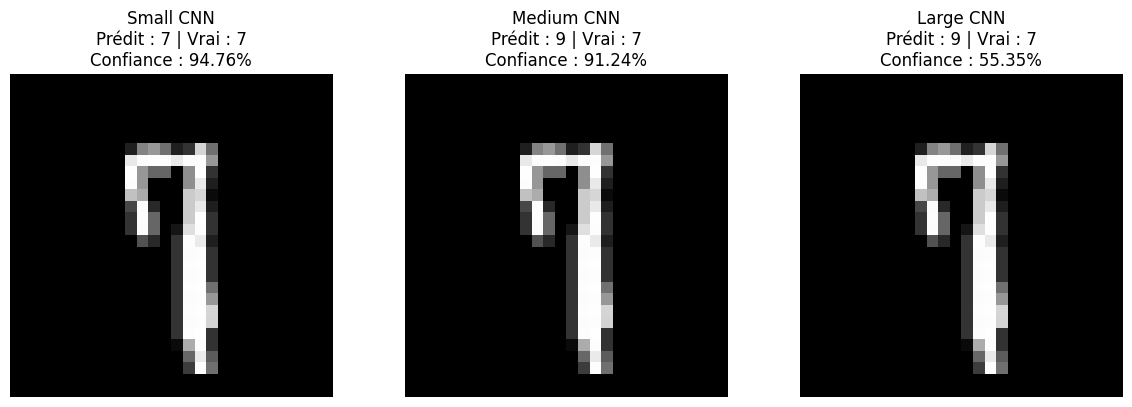

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Choisir une image de test aléatoire
index = np.random.randint(0, X_test.shape[0])
image = X_test[index]
true_label = np.argmax(y_test[index])

# Fonction pour prédire avec un modèle donné
def get_prediction_info(model, image):
    prediction = model.predict(image.reshape(1, 28, 28, 1), verbose=0)
    predicted_label = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    return predicted_label, confidence

# Obtenir les prédictions
pred_small, conf_small = get_prediction_info(model_small_loaded, image)
pred_medium, conf_medium = get_prediction_info(model_medium_loaded, image)
pred_large, conf_large = get_prediction_info(model_large_loaded, image)

# Affichage côte à côte
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
models = ["Small CNN", "Medium CNN", "Large CNN"]
preds = [pred_small, pred_medium, pred_large]
confs = [conf_small, conf_medium, conf_large]
axs_titles = []

for i, ax in enumerate(axs):
    ax.imshow(image.reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"{models[i]}\nPrédit : {preds[i]} | Vrai : {true_label}\nConfiance : {confs[i]:.2f}%")

plt.tight_layout()
plt.show()
